In [1]:
import hashlib
import requests
import datetime
import pandas as pd

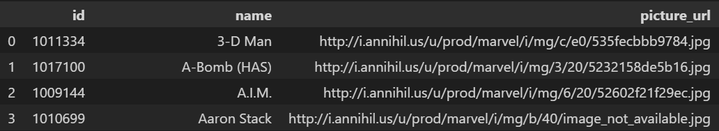

Queremos que consultes a la API para que te devuelva la información de los personajes de Marvel que empiecen con la inicial de tu nombre. Deberemos guardarlos en un csv con la siguiente información (Notebook completo del profesor)

In [2]:
def hash_params(timestamp,priv_key,pub_key):
    """ Marvel API requires server side API calls to include
    md5 hash of timestamp + public key + private key """

    hash_md5 = hashlib.md5()
    hash_md5.update(f'{timestamp}{priv_key}{pub_key}'.encode('utf-8'))
    hashed_params = hash_md5.hexdigest()

    return hashed_params

In [3]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d%H:%M:%S')

pub_key = '076c4a610c5e24d27ef62ed5c3c04ad1'
priv_key = '156fa2899bfc46a89f3ffda6566a6b5ce57e3573'

params = {'ts': timestamp, 
        'apikey': pub_key, 
        'hash': hash_params(timestamp,priv_key,pub_key),
        'nameStartsWith':'A',
        # 'offset': 99,
        'limit': 99,
        # 'name':'hulk'
        }

url = 'http://gateway.marvel.com/v1/public/characters'

res = requests.get(url,params=params).json ()
res

{'code': 200,
 'status': 'Ok',
 'copyright': '© 2025 MARVEL',
 'attributionText': 'Data provided by Marvel. © 2025 MARVEL',
 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2025 MARVEL</a>',
 'etag': '919462ee1ecd05e564f652ec5b40976eb11e5f36',
 'data': {'offset': 0,
  'limit': 99,
  'total': 84,
  'count': 84,
  'results': [{'id': 1017100,
    'name': 'A-Bomb (HAS)',
    'description': "Rick Jones has been Hulk's best bud since day one, but now he's more than a friend...he's a teammate! Transformed by a Gamma energy explosion, A-Bomb's thick, armored skin is just as strong and powerful as it is blue. And when he curls into action, he uses it like a giant bowling ball of destruction! ",
    'modified': '2013-09-18T15:54:04-0400',
    'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/3/20/5232158de5b16',
     'extension': 'jpg'},
    'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1017100',
    'comics': {'available': 4,
     'collect

In [4]:
#mis intentos infructuosos en clase
# url = 'https://gateway.marvel.com:443/v1/public/characters?nameStartsWith=A&apikey=076c4a610c5e24d27ef62ed5c3c04ad1'
# response = requests.get(url)
# data = response.json()

# # marvel_A_list = [{"id" : marvel["id"], "name": marvel["name"], "picture_url": marvel["path"]} for marvel in data["results"]]

# # marvel_A_df = pd.DataFrame(marvel_A_list)
# # marvel_A_df

In [5]:
#prefiero trabajar con df porque los veo más claramente
res_df=pd.DataFrame(res)

In [6]:
res_df.head(8)

,code,status,copyright,attributionText,attributionHTML,etag,data
offset,200,Ok,© 2025 MARVEL,Data provided by Marvel. © 2025 MARVEL,"<a href=""http://marvel.com"">Data provided by M...",919462ee1ecd05e564f652ec5b40976eb11e5f36,0
limit,200,Ok,© 2025 MARVEL,Data provided by Marvel. © 2025 MARVEL,"<a href=""http://marvel.com"">Data provided by M...",919462ee1ecd05e564f652ec5b40976eb11e5f36,99
total,200,Ok,© 2025 MARVEL,Data provided by Marvel. © 2025 MARVEL,"<a href=""http://marvel.com"">Data provided by M...",919462ee1ecd05e564f652ec5b40976eb11e5f36,84
count,200,Ok,© 2025 MARVEL,Data provided by Marvel. © 2025 MARVEL,"<a href=""http://marvel.com"">Data provided by M...",919462ee1ecd05e564f652ec5b40976eb11e5f36,84
results,200,Ok,© 2025 MARVEL,Data provided by Marvel. © 2025 MARVEL,"<a href=""http://marvel.com"">Data provided by M...",919462ee1ecd05e564f652ec5b40976eb11e5f36,"[{'id': 1017100, 'name': 'A-Bomb (HAS)', 'desc..."


In [7]:
res_df1 = res_df['data']    #voy entrand opoco a poco en cada nivel
res_df1

offset                                                     0
limit                                                     99
total                                                     84
count                                                     84
results    [{'id': 1017100, 'name': 'A-Bomb (HAS)', 'desc...
Name: data, dtype: object

In [8]:
res_df2 = res_df1['results'][1]  #entro en el siguiente nivel, y, para verlo mejor, selecciono solo el primer elemnteo.
res_df2

{'id': 1009144,
 'name': 'A.I.M.',
 'description': 'AIM is a terrorist organization bent on destroying the world.',
 'modified': '2013-10-17T14:41:30-0400',
 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/6/20/52602f21f29ec',
  'extension': 'jpg'},
 'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1009144',
 'comics': {'available': 53,
  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1009144/comics',
  'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/36763',
    'name': 'Ant-Man & Wasp (2010) #3'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/17553',
    'name': 'Avengers (1998) #67'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/7340',
    'name': 'Avengers (1963) #87'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/4214',
    'name': 'Avengers and Power Pack Assemble! (2006) #2'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/63217',
    'name': 'A

In [9]:

#de aqui en addelante, lo hago con ayuda de Juan M
personaje = res['data']['results'][1]
personaje

{'id': 1009144,
 'name': 'A.I.M.',
 'description': 'AIM is a terrorist organization bent on destroying the world.',
 'modified': '2013-10-17T14:41:30-0400',
 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/6/20/52602f21f29ec',
  'extension': 'jpg'},
 'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1009144',
 'comics': {'available': 53,
  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1009144/comics',
  'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/36763',
    'name': 'Ant-Man & Wasp (2010) #3'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/17553',
    'name': 'Avengers (1998) #67'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/7340',
    'name': 'Avengers (1963) #87'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/4214',
    'name': 'Avengers and Power Pack Assemble! (2006) #2'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/63217',
    'name': 'A

In [10]:
personaje.keys()    #para ver lo que tengo que tomar

dict_keys(['id', 'name', 'description', 'modified', 'thumbnail', 'resourceURI', 'comics', 'series', 'stories', 'events', 'urls'])

In [11]:
id_personaje = personaje.get('id')
name_personaje = personaje.get('name')
picture_url = personaje.get('thumbnail').get('path') + '.' + personaje.get('thumbnail').get('extension')

print(id_personaje,name_personaje, picture_url)

1009144 A.I.M. http://i.annihil.us/u/prod/marvel/i/mg/6/20/52602f21f29ec.jpg


In [12]:
lista_id = []
lista_name = []
lista_url = []
for i in range(len(res['data']['results'])):
    personaje = res['data']['results'][i]
    id_personaje = personaje.get('id')
    name_personaje = personaje.get('name')
    picture_url = personaje.get('thumbnail').get('path') + '.' + personaje.get('thumbnail').get('extension')
    lista_id.append(id_personaje)
    lista_name.append(name_personaje)
    lista_url.append(picture_url)


In [13]:
dict = {'key': lista_id,  'name' : lista_name, 'url' : lista_url}
dict

{'key': [1017100,
  1009144,
  1010699,
  1009146,
  1016823,
  1009148,
  1009149,
  1010903,
  1011266,
  1010354,
  1010846,
  1017851,
  1012717,
  1011297,
  1011031,
  1009150,
  1011198,
  1011175,
  1011136,
  1011176,
  1010870,
  1011194,
  1011170,
  1009240,
  1011120,
  1010836,
  1010755,
  1011214,
  1009497,
  1014990,
  1009435,
  1010370,
  1011324,
  1011164,
  1011227,
  1009567,
  1011382,
  1011361,
  1009151,
  1010672,
  1010673,
  1010905,
  1009152,
  1016824,
  1011684,
  1011396,
  1011338,
  1009153,
  1017574,
  1010674,
  1009346,
  1009154,
  1011301,
  1010802,
  1009155,
  1010801,
  1011208,
  1009156,
  1011253,
  1010866,
  1010773,
  1017438,
  1009158,
  1010686,
  1009159,
  1009160,
  1010784,
  1011275,
  1011012,
  1011298,
  1010827,
  1009740,
  1010748,
  1009161,
  1010718,
  1009162,
  1010835,
  1010336,
  1011758,
  1009163,
  1009164,
  1009165,
  1015239,
  1011766],
 'name': ['A-Bomb (HAS)',
  'A.I.M.',
  'Aaron Stack',
  'Abominatio

In [14]:
marvel_df = pd.DataFrame(dict)
marvel_df


,key,name,url
0,1017100,A-Bomb (HAS),http://i.annihil.us/u/prod/marvel/i/mg/3/20/52...
1,1009144,A.I.M.,http://i.annihil.us/u/prod/marvel/i/mg/6/20/52...
2,1010699,Aaron Stack,http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...
3,1009146,Abomination (Emil Blonsky),http://i.annihil.us/u/prod/marvel/i/mg/9/50/4c...
4,1016823,Abomination (Ultimate),http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...
...,...,...,...
79,1009163,Aurora,http://i.annihil.us/u/prod/marvel/i/mg/f/10/4c...
80,1009164,Avalanche,http://i.annihil.us/u/prod/marvel/i/mg/f/10/4c...
81,1009165,Avengers,http://i.annihil.us/u/prod/marvel/i/mg/9/20/51...
82,1015239,Avengers (Ultimate),http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...
